# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from ratelimiter import RateLimiter

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

In [3]:
# Components of api endpoint(s)
url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "units=Imperial"
api = "&APPID=" + weather_api_key

# Creates variable for response code then prints response code to the console
response = requests.get(url + unit + api).json()
print(response)

# Creates dictionary for data to be stored from the api calls
city_data = {"City": [],
              "Lat": [],
              "Lng": [],
              "Max Temp": [],
              "Humidity": [],
              "Cloudiness": [],
              "Wind Speed": [],
              "Country": [],
              "Date": []}

MINUTE = 60

# Decorator that limits "call_api" function to 60 api calls per minute
@RateLimiter(max_calls=60, period=MINUTE)
def call_api():
    
    # A loop that repeats an api call with dynamic endpoints then adds data retrieved from each api call into "city_data" dictionary
    for i, city in enumerate(cities):
        city = requests.get(url + unit + "&q=" + cities[i] + api).json()

        try:
            print("Processing city " + str(i) + ": " + city["name"])

            city_data["City"].append(city["name"])
            city_data["Lat"].append(city["coord"]["lat"])
            city_data["Lng"].append(city["coord"]["lon"])
            city_data["Max Temp"].append(city["main"]["temp_max"])
            city_data["Humidity"].append(city["main"]["humidity"])
            city_data["Cloudiness"].append(city["clouds"]["all"])
            city_data["Wind Speed"].append(city["wind"]["speed"])
            city_data["Country"].append(city["sys"]["country"])
            city_data["Date"].append(city["dt"])

        except:
            print("Incomplete record. Skipping city instance...")
            pass
    print("Data retrieval is complete.")
    
call_api()
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

{'cod': '400', 'message': 'Nothing to geocode'}
Processing city 0: Hermanus
Processing city 1: Dikson
Processing city 2: Bambanglipuro
Processing city 3: Kahului
Processing city 4: Okány
Processing city 5: Thinadhoo
Processing city 6: Lompoc
Processing city 7: Warwick
Processing city 8: Kamiiso
Processing city 9: Mill Valley
Processing city 10: Busselton
Processing city 11: Rikitea
Processing city 12: Maturin
Processing city 13: Mataura
Processing city 14: Tautira
Processing city 15: Ovsyanka
Processing city 16: Kawalu
Processing city 17: Provideniya
Processing city 18: Najrān
Incomplete record. Skipping city instance...
Processing city 20: Nuuk
Processing city 21: Nikolskoye
Processing city 22: Vaini
Processing city 23: Adrar
Processing city 24: Upernavik
Processing city 25: Morant Bay
Processing city 26: Airai
Incomplete record. Skipping city instance...
Incomplete record. Skipping city instance...
Processing city 29: Nouadhibou
Processing city 30: Port Elizabeth
Processing city 31: 

Processing city 259: Pedasí
Processing city 260: Ketchikan
Processing city 261: Klaksvík
Processing city 262: Khatanga
Processing city 263: Upata
Processing city 264: Viseu
Processing city 265: Erenhot
Processing city 266: Marawi
Processing city 267: Al Bardīyah
Processing city 268: Tornio
Incomplete record. Skipping city instance...
Processing city 270: Saskylakh
Incomplete record. Skipping city instance...
Processing city 272: Te Anau
Processing city 273: Mahon
Processing city 274: Russell
Processing city 275: Northam
Processing city 276: Clyde River
Incomplete record. Skipping city instance...
Processing city 278: Karratha
Processing city 279: Tena
Processing city 280: Saucillo
Processing city 281: Katsuura
Incomplete record. Skipping city instance...
Processing city 283: Kalmunai
Processing city 284: Cabedelo
Processing city 285: Ōzu
Processing city 286: Mahajanga
Incomplete record. Skipping city instance...
Processing city 288: Neiafu
Processing city 289: Tankhoy
Processing city 2

Processing city 518: Presidencia Roque Sáenz Peña
Processing city 519: Mukdahan
Processing city 520: Caronport
Processing city 521: Dukat
Processing city 522: Zonguldak
Processing city 523: Ajdabiya
Processing city 524: Padang
Processing city 525: Singaraja
Processing city 526: Jardim
Incomplete record. Skipping city instance...
Processing city 528: Fomboni
Processing city 529: Havøysund
Processing city 530: Gīdolē
Incomplete record. Skipping city instance...
Processing city 532: Iwanai
Processing city 533: Dagana
Processing city 534: Kitimat
Processing city 535: Camaná
Processing city 536: Casper
Processing city 537: Sawākin
Processing city 538: Pacific Grove
Incomplete record. Skipping city instance...
Processing city 540: Oranjemund
Processing city 541: Mackay
Processing city 542: Pilar
Processing city 543: Guarapari
Processing city 544: The Valley
Incomplete record. Skipping city instance...
Processing city 546: Severo-Yeniseyskiy
Processing city 547: Guhāgar
Processing city 548: M

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          518
Lat           518
Lng           518
Max Temp      518
Humidity      518
Cloudiness    518
Wind Speed    518
Country       518
Date          518
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,49.80,73,99,4.85,ZA,1668652990
1,Dikson,73.5069,80.5464,1.44,93,100,19.01,RU,1668652990
2,Bambanglipuro,-7.9500,110.2833,86.61,66,44,3.51,ID,1668652990
3,Kahului,20.8947,-156.4700,84.22,65,20,18.41,US,1668652990
4,Okány,46.9000,21.3500,52.56,97,100,5.23,HU,1668652991


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hermanus,-34.4187,19.2345,49.80,73,99,4.85,ZA,1668652990
1,Dikson,73.5069,80.5464,1.44,93,100,19.01,RU,1668652990
2,Bambanglipuro,-7.9500,110.2833,86.61,66,44,3.51,ID,1668652990
3,Kahului,20.8947,-156.4700,84.22,65,20,18.41,US,1668652990
4,Okány,46.9000,21.3500,52.56,97,100,5.23,HU,1668652991


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

The r-squared is: 0.523


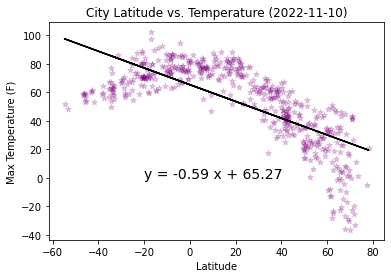

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(1)
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, max_temp)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, max_temp, marker="*", color="purple", alpha = 0.2)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(-20,0), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (2022-11-10)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

The r-squared is: 0.042


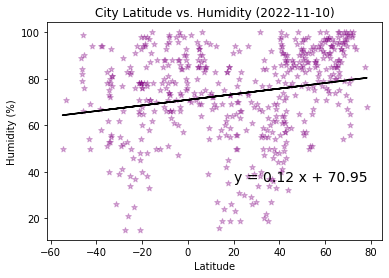

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(2)
humidity = city_data_df["Humidity"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, humidity)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, humidity, marker="*", color="purple", alpha = 0.3)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(20,36), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-11-10)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

The r-squared is: 0.013


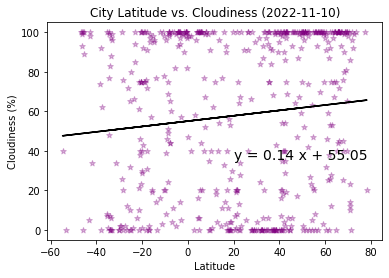

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(3)
cloudiness = city_data_df["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, cloudiness)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, cloudiness, marker="*", color="purple", alpha = 0.3)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(20,36), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-11-10)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

The r-squared is: 0.009


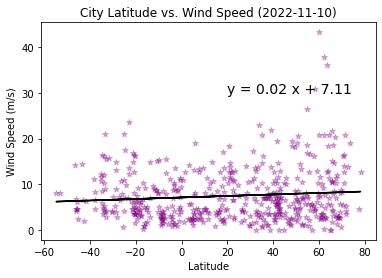

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(4)
wind_speed = city_data_df["Wind Speed"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(lat, wind_speed)
regress_values = lat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lat, wind_speed, marker="*", color="purple", alpha = 0.3)
plt.plot(lat, regress_values, color='black')
plt.annotate(line_eq,(20,30), fontsize=14)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-11-10)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-squared is: {round(rvalue**2,3)}")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
North_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
North_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Dikson,73.5069,80.5464,1.44,93,100,19.01,RU,1668652990
3,Kahului,20.8947,-156.4700,84.22,65,20,18.41,US,1668652990
4,Okány,46.9000,21.3500,52.56,97,100,5.23,HU,1668652991
5,Thinadhoo,0.5333,72.9333,81.25,71,98,11.01,MV,1668652991
6,Lompoc,34.6391,-120.4579,55.78,58,0,3.44,US,1668652992


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
South_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
South_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Hermanus,-34.4187,19.2345,49.80,73,99,4.85,ZA,1668652990
2,Bambanglipuro,-7.9500,110.2833,86.61,66,44,3.51,ID,1668652990
10,Busselton,-33.6500,115.3333,62.26,56,88,21.00,AU,1668652993
11,Rikitea,-23.1203,-134.9692,73.58,91,100,23.60,PF,1668652993
13,Mataura,-46.1927,168.8643,58.48,82,99,4.14,NZ,1668652994


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.718
y = -1.19 x + 92.37


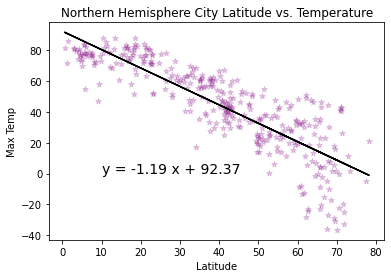

In [14]:
# Linear regression on Northern Hemisphere
plt.figure(5)
nlat = North_df["Lat"]
nmax_temp = North_df["Max Temp"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(nlat, nmax_temp)
regress_values = nlat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(nlat, nmax_temp, marker="*", color="purple", alpha = 0.2)
plt.plot(nlat, regress_values, color='black')
plt.annotate(line_eq,(10,0), fontsize=14)

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

The r-squared is: 0.412
y = 0.51 x + 81.71


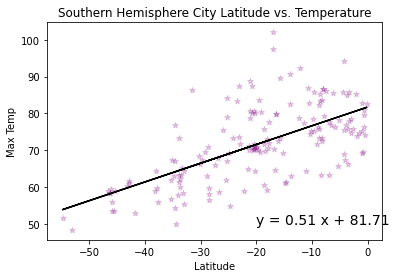

In [15]:
# Linear regression on Southern Hemisphere
plt.figure(6)
slat = South_df["Lat"]
smax_temp = South_df["Max Temp"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(slat, smax_temp)
regress_values = slat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(slat, smax_temp, marker="*", color="purple", alpha = 0.2)
plt.plot(slat, regress_values, color='black')
plt.annotate(line_eq,(-20,50), fontsize=14, color='black')

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We can see that here is a relationship between latitude and temperatures. The high r squared values also align with the correlation between the two variables. We do see that the northern hemisphere has a stronger correlation when compared to the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.126
y = 0.36 x + 59.52


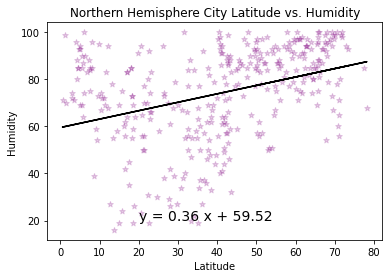

In [16]:
# Northern Hemisphere
plt.figure(7)
nlat = North_df["Lat"]
nhumidity = North_df["Humidity"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(nlat, nhumidity)
regress_values = nlat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(nlat, nhumidity, marker="*", color="purple", alpha = 0.2)
plt.plot(nlat, regress_values, color='black')
plt.annotate(line_eq,(20,20), fontsize=14, color='black')

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()

The r-squared is: 0.046
y = 0.31 x + 78.47


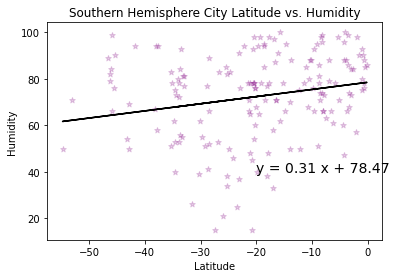

In [17]:
# Southern Hemisphere
plt.figure(8)
slat = South_df["Lat"]
shumidity = South_df["Humidity"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(slat, shumidity)
regress_values = slat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(slat, shumidity, marker="*", color="purple", alpha = 0.2)
plt.plot(slat, regress_values, color='black')
plt.annotate(line_eq,(-20,40), fontsize=14, color='black')

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

**Discussion about the linear relationship:**  We can see that here there is not a relationship between latitude and humidity. The low r squared values also align with the weak or non correlation between the two variables. We do see that the northern hemisphere has a stronger correlation when compared to the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.051
y = 0.46 x + 39.0


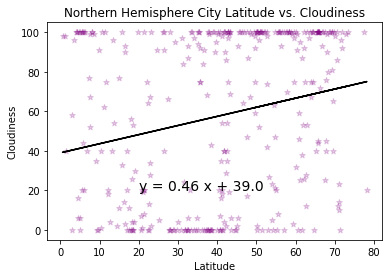

In [18]:
# Northern Hemisphere
plt.figure(9)
nlat = North_df["Lat"]
ncloudiness = North_df["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(nlat, ncloudiness)
regress_values = nlat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(nlat, ncloudiness, marker="*", color="purple", alpha = 0.2)
plt.plot(nlat, regress_values, color='black')
plt.annotate(line_eq,(20,20), fontsize=14, color='black')

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()

The r-squared is: 0.048
y = 0.66 x + 71.39


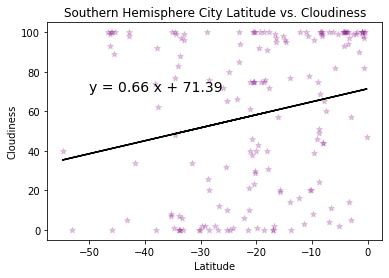

In [19]:
# Southern Hemisphere
plt.figure(10)
slat = South_df["Lat"]
scloudiness = South_df["Cloudiness"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(slat, scloudiness)
regress_values = slat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(slat, scloudiness, marker="*", color="purple", alpha = 0.2)
plt.plot(slat, regress_values, color='black')
plt.annotate(line_eq,(-50,70), fontsize=14, color='black')

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We can see that here there is not a relationship between latitude and cloudiness. The low r squared values also align with lake of a correlation between the two variables. We do see that the northern hemisphere has a stronger correlation when compared to the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.025
y = 0.05 x + 5.73


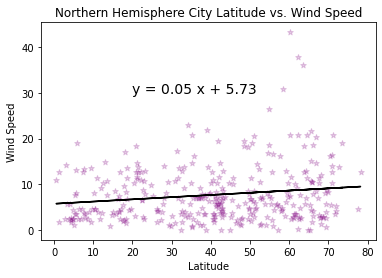

In [20]:
# Northern Hemisphere
plt.figure(11)
nlat = North_df["Lat"]
nwind_speed = North_df["Wind Speed"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(nlat, nwind_speed)
regress_values = nlat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(nlat, nwind_speed, marker="*", color="purple", alpha = 0.2)
plt.plot(nlat, regress_values, color='black')
plt.annotate(line_eq,(20,30), fontsize=14, color='black')

# Incorporate the other graph properties
plt.title("Northern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()

The r-squared is: 0.036
y = -0.07 x + 5.63


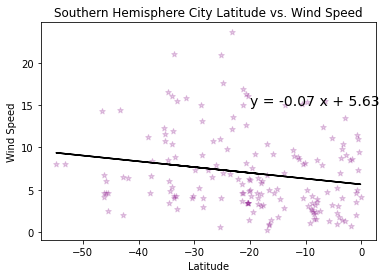

In [21]:
# Southern Hemisphere
plt.figure(12)
slat = South_df["Lat"]
swind_speed = South_df["Wind Speed"]
(slope, intercept,rvalue, pvalue, stderr) = linregress(slat, swind_speed)
regress_values = slat * slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(slat, swind_speed, marker="*", color="purple", alpha = 0.2)
plt.plot(slat, regress_values, color='black')
plt.annotate(line_eq,(-20,15), fontsize=14, color='black')

# Incorporate the other graph properties
plt.title("Southern Hemisphere City Latitude vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {round(rvalue**2,3)}")
print(line_eq)

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** We can see that here there is not a storng relationship between latitude and wind speed. The low r squared values also align with the weak correlation between the two variables. We do see that the southern hemisphere has a stronger correlation when compared to the northern hemisphere.